In [1]:
!pip3 install shap

In [1]:
from simulations import simulation1
from shapley_values.causal_shap import Explainer, ShapleyValuesType
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from shapley_values.utils import get_baseline
import numpy as np
from xgboost import XGBRegressor
import shap

np.random.seed(0)

X, y = simulation1()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

feature_names = ['Parental income', "School funding"]

sample = X_test[0]

explainer = Explainer(X = X_train, model = model, is_classification=False)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Baseline f(x):  0.9365065
Predicted f(x):  [1.3157153]
Sigma_phi + E(fX):  1.316


In [2]:
explanation = shap.Explanation(values=np.array(list(phis.values())),
                                feature_names=feature_names,
                                base_values=get_baseline(X_train, model),  # Predicted value for the sample
                                output_names=['Prediction'])

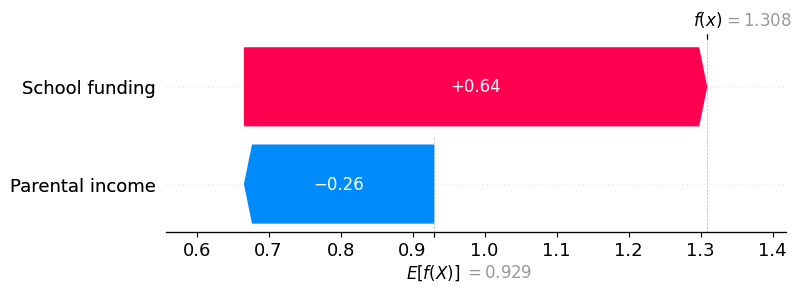

In [3]:
shap.plots.waterfall(explanation)

Inspired by: https://github.com/saifkhanali9/causal-shapley/blob/shapley/scripts/marginal_shapley.py